In [1]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [22]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=150,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [15]:
df = pd.read_csv("./Data/usedCleaned21.csv")

In [16]:
df_enc = df

In [17]:
from sklearn.preprocessing import OneHotEncoder

#df_enc = pd.read_csv("./Data/usedCleaned20.csv")
X_t =  df_enc.drop(columns='Cena')
Y_t = df_enc['Cena']

df_enc = pd.get_dummies(df_enc)
X =  df_enc.drop(columns='Cena')
Y = df_enc['Cena']


X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)
X_train_t, X_test_t, y_train_t, y_test_t =train_test_split(X_t,Y_t,
                                                   test_size=0.3,
                                                   random_state=0)

In [18]:
X_train.iloc[0]

Godiste               2010.0
Kilometraza         177300.0
Kubikaza                 1.2
Snaga motora            60.0
Marka_Alfa Romeo         0.0
                      ...   
Boja_Crna                0.0
Boja_Crvena              0.0
Boja_Druga               0.0
Boja_Plava               0.0
Boja_Siva                1.0
Name: 6978, Length: 119, dtype: float64

In [27]:
X_train_t.iloc[0]

Marka                        Skoda
Model                        Fabia
Godiste                       2010
Kilometraza                 177300
Karoserija                  Hecbek
Gorivo          Benzin + Gas (TNG)
Kubikaza                       1.2
Snaga motora                    60
Pogon                     Prednji 
Menjac          Manuelni 5 brzina 
Boja                          Siva
Name: 6978, dtype: object

In [28]:
X_train

,Godiste,Kilometraza,Kubikaza,Snaga motora,Marka_Alfa Romeo,Marka_Audi,Marka_BMW,Marka_Citroen,Marka_Fiat,Marka_Ford,...,Pogon_Zadnji,Menjac_Automatski / poluautomatski,Menjac_Manuelni 5 brzina,Menjac_Manuelni 6 brzina,Boja_Bela,Boja_Crna,Boja_Crvena,Boja_Druga,Boja_Plava,Boja_Siva
6978,2010,177300,1.2,60,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5548,2010,225000,1.4,90,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
9074,2017,150000,1.6,135,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4774,2010,196988,1.7,125,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3896,2008,191000,2.0,145,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2008,122000,2.0,110,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3264,2011,156000,2.0,140,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9845,2002,225736,1.9,120,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10799,2006,180000,2.0,140,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [29]:
## Hyperparameters tuning

In [33]:
# model
model = XGBRegressor()

# A parameter grid for XGBoost
hyperparameters = {
        'gamma':[i/10.0 for i in range(0,4)],
        'n_estimators':range(200,1501,200),
        'max_depth':range(7,16,2),
        'min_child_weight':[4,6,8, 10],
        'subsample':[i/100.0 for i in range(75,100,5)],
        'colsample_bytree':[i/100.0 for i in range(65,90,5)],
        'reg_alpha':[0.05]
        }
print('*'*30)
print('XGBRegressor')
print('*'*30)
XGB_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
Prediction_XGB = XGB_RandSearch.BestModelPridict(X_test)

#{'subsample': 0.8, 'reg_alpha': 0.05, 'min_child_weight': 6, 'max_depth': 11, 'gamma': 0.2, 'colsample_bytree': 0.75} {'subsample': 0.8, 'reg_alpha': 0.05, 'min_child_weight': 6, 'max_depth': 11, 'gamma': 0.2, 'colsample_bytree': 0.75}

******************************
XGBRegressor
******************************
Best: 0.969971 using {'subsample': 0.95, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 7, 'gamma': 0.0, 'colsample_bytree': 0.75}


In [34]:
param = {'subsample': 0.95, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 7, 'gamma': 0.0, 'colsample_bytree': 0.75}
model1 = XGBRegressor(**param)#**param

In [35]:
model1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
predictions = model1.predict(X_test)

In [37]:
print(r2_score(y_test,predictions))
#print(mean_a(y_test_c,p_sl))

0.9709369462911396


In [38]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,predictions))

392.18852881146523


In [96]:
X_test.shape, y_test.shape

((7498, 224), (7499,))

In [39]:
df_out = X_test_t
df_out['Cena_actual'] = y_test
df_out['Cena_predicted'] = predictions

In [40]:
df_out['MAE'] = abs(df_out['Cena_actual']-df_out['Cena_predicted'])

In [41]:
df_out[df_out['MAE']==df_out['MAE'].max()]

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Pogon,Menjac,Boja,Cena_actual,Cena_predicted,MAE
9521,Seat,Leon,2018,200449,Karavan,Dizel,2.0,150,Prednji,Automatski / poluautomatski,Crna,11000,15600.253906,4600.253906


In [42]:
import pickle
with open('ml_model21.pkl', 'wb') as files:
    pickle.dump(model1, files)

In [45]:
# model
model = LGBMRegressor()
hyperparameters = {
    'n_estimators':range(200, 801,200),
    'num_leaves': [60, 80, 120],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 70],
    'lambda_l1': [0, 1, 1.5]
    #'lambda_l2': [0, 1]
    }
print('*'*30)
print('LGBMRegressor')
print('*'*30)
LGBM_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
Prediction_LGBM = LGBM_RandSearch.BestModelPridict(X_test)
#params = {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30, 'lambda_l2': 0, 'lambda_l1': 0}

******************************
LGBMRegressor
******************************
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
Best: 0.970873 using {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30, 'lambda_l1': 0}


In [19]:
param = {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30, 'lambda_l1': 0}
model1 = LGBMRegressor(**param)
model1.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0


LGBMRegressor(lambda_l1=0, min_data_in_leaf=30, n_estimators=400, num_leaves=60,
              reg_alpha=0.1)

In [20]:
predictions = model1.predict(X_test)

In [21]:
print(r2_score(y_test,predictions))
#print(mean_a(y_test_c,p_sl))

0.9734276287178888


In [22]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,predictions))

376.7070518069196


In [23]:
import pickle
with open('model_lgb21.pkl', 'wb') as files:
    pickle.dump(model1, files)

In [ ]:
df.style

In [172]:
# model
model = ExtraTreesRegressor()
hyperparameters = {
    #'criterion': ['mae'],
    'max_depth': [2,8,16],
    'n_estimators': range(50,1500,25),
    'max_features': range(50,401,50),
    'min_samples_leaf': range(20,50,5),
    'min_samples_split': range(15,36,5),
}

print('*'*30)
print('ExtraTreesRegressor')
print('*'*30)
#Extra_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_Extra = Extra_RandSearch.BestModelPridict(X_test)
#{'n_estimators': 850, 'min_samples_split': 20, 'min_samples_leaf': 25, 'max_features': 100, 'max_depth': 16}

******************************
ExtraTreesRegressor
******************************
Best: 0.929340 using {'n_estimators': 850, 'min_samples_split': 20, 'min_samples_leaf': 25, 'max_features': 100, 'max_depth': 16}


In [195]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# model
model = RandomForestRegressor()

print('*'*30)
print('RandomForestRegressor')
print('*'*30)
#RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_Extra = RandSearch.BestModelPridict(X_test)

******************************
RandomForestRegressor
******************************


In [174]:
from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor()

hyperparameters = {
    'n_estimators':range(500, 2001,200),
    'max_depth':range(5,18,2), 
    'min_samples_split':range(100,501,100), 
    'min_samples_leaf':range(30,101,10),
    'max_features':range(16,24,2),
    'subsample':[0.8, 0.85,0.87],
    'learning_rate': [0.001, 0.01, 0.0001]
}


print('*'*30)
print('GradientBoostingRegressor')
print('*'*30)

GB_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
Prediction_GB = GB_RandSearch.BestModelPridict(X_test)
#{'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01}

******************************
GradientBoostingRegressor
******************************
Best: 0.962962 using {'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01}


In [51]:
param = {'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01}
model1 = GradientBoostingRegressor(**param)
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
print(r2_score(y_test,predictions))

0.9700423844839418


In [52]:
print(mean_absolute_error(y_test,predictions))

401.2925864038721


In [54]:
def get_models():
    """Generate a library of base learners."""
    param = {'subsample': 0.95, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 7, 'gamma': 0.0, 'colsample_bytree': 0.75}
    model1 = XGBRegressor(**param)

    param = {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30}
    model2 = LGBMRegressor(**param)
    
    param = {'n_estimators': 850, 'min_samples_split': 20, 'min_samples_leaf': 25, 'max_features': 0.85, 'max_depth': 16}
    model3 = ExtraTreesRegressor(**param)
    

    models = {'XGM':model1, 'LGBM':model2,
              'ETR':model3
              }

    return models

In [55]:

base_learners = get_models()
params = {'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01, 'random_state':7}
meta_learner = GradientBoostingRegressor(n_estimators=1700,
    max_features=0.7,
    max_depth=13,
    subsample=0.85,
    learning_rate=0.01, 
    random_state=7)

In [56]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=7,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values())) 
sl.add_meta(meta_learner)

# Train the ensemble
sl.fit(X_train, y_train)

# Predict the test set
p_sl = sl.predict(X_test)

[MLENS] backend: threading



Fitting 2 layers


[MLENS] Found 4 residual cache(s):
        1 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_0_mgr9to
        2 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_7vonrz1p
        3 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_kk8gnu5s
        4 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_mb0lfo1a
        Total size: 16384
[MLENS] Removing... done.


Processing layer-1             done | 00:02:09
Processing layer-2             done | 00:00:28
Fit complete                        | 00:02:39

Predicting 2 layers
Processing layer-1             done | 00:00:04
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:06


In [57]:
print(r2_score(y_test,p_sl))

0.9695659416899345


In [58]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,p_sl))

404.5669483408176


In [188]:
import pickle
with open('ml_modelSuper.pkl', 'wb') as files:
    pickle.dump(sl, files)

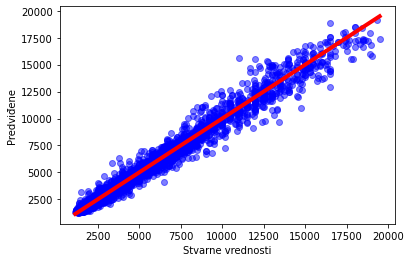

In [62]:
#Plot Real vs Predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, color='blue', edgecolors=(0, 0, 1),alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4,color='Red')
ax.set_xlabel('Stvarne vrednosti')
ax.set_ylabel('Predviđene')
plt.show()